In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bullying/Bullying.csv


# The dataset is about the kids being bullied and the data is collected from a region in USA. The dataset contains data about on-school, off-school, cyber bullying, their age, sex, how many times were they physically attacked and involved in physical fighting, how many close friends they have, whether they skip school without permission etc.
### OnSchool_Bullying_12mo : Bullying on school premesis in the past 12 months (Yes, No)
### OffSchool_Bullying_12mo : Bullying off school premesis in the past 12 months (Yes, No)
### Cyberbullying_12mo : Bullying on internet in the past 12 months (Yes, No)
### Custom_Age : Age of the victim
### Sex : Gender of the victim
### Physically_attacked : how many times were they attacked physically
### Physical_fighting : how many times were they involved by themselves in fighting
### Felt_lonely : how many times did they feel lonely because of bullying
### Close_friends : how many close friends did the victim had
### Days_Unexcused_Absence : how many days did the victim didn't attend the school without informing
### Supportive_Classmates : how often were their classmates supportive to the victim (rarely, always, sometimes, never etc)
### Supportive_Parents : how often were their parents supportive to the victim (rarely, always, sometimes, never etc)
### Persistent_Loneliness : did they feel lonely too often (Yes, No)
### Unexcused_Absence : did they miss the school without informing (Yes, No)
### Underweight : was the victim underweight? (Yes, No, Unknown)
### Overweight : was the victim overweight? (Yes, No, Unknown)
### Obese : was the victim obese? (Yes, No, Unknown)

In [2]:
bully = pd.read_csv("/kaggle/input/bullying/Bullying.csv")
bully

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,No,Yes,No,16 years old,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,No,No,No,Yes,No
56977,57092,No,No,No,16 years old,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,No,,,
56978,57093,No,No,No,16 years old,Male,0 times,0 times,Sometimes,3 or more,0 days,Rarely,Sometimes,No,No,,,
56979,57094,No,Yes,No,16 years old,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,No,,,


#### The column names are too long to be read, hence we rename the columns with appropriate and short names

In [3]:
bully = bully.rename(columns={'Bullied_on_school_property_in_past_12_months':'OnSchool_Bullying_12mo', 'Bullied_not_on_school_property_in_past_12_months':'OffSchool_Bullying_12mo','Cyber_bullied_in_past_12_months':'Cyberbullying_12mo','Miss_school_no_permission':'Days_Unexcused_Absence','Other_students_kind_and_helpful':'Supportive_Classmates','Parents_understand_problems':'Supportive_Parents','Most_of_the_time_or_always_felt_lonely':'Persistent_Loneliness','Missed_classes_or_school_without_permission':'Unexcused_Absence','Were_underweight':'Underweight','Were_overweight':'Overweight','Were_obese':'Obese'})
bully

,record,OnSchool_Bullying_12mo,OffSchool_Bullying_12mo,Cyberbullying_12mo,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Days_Unexcused_Absence,Supportive_Classmates,Supportive_Parents,Persistent_Loneliness,Unexcused_Absence,Underweight,Overweight,Obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,No,Yes,No,16 years old,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,No,No,No,Yes,No
56977,57092,No,No,No,16 years old,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,No,,,
56978,57093,No,No,No,16 years old,Male,0 times,0 times,Sometimes,3 or more,0 days,Rarely,Sometimes,No,No,,,
56979,57094,No,Yes,No,16 years old,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,No,,,


In [4]:
bully.drop('record', axis=1, inplace=True)
bully

,OnSchool_Bullying_12mo,OffSchool_Bullying_12mo,Cyberbullying_12mo,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Days_Unexcused_Absence,Supportive_Classmates,Supportive_Parents,Persistent_Loneliness,Unexcused_Absence,Underweight,Overweight,Obese
0,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,No,Yes,No,16 years old,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,No,No,No,Yes,No
56977,No,No,No,16 years old,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,No,,,
56978,No,No,No,16 years old,Male,0 times,0 times,Sometimes,3 or more,0 days,Rarely,Sometimes,No,No,,,
56979,No,Yes,No,16 years old,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,No,,,


#### The Custom_Age is supposed to be a numerical value but it is object with strings in it, hence we retrieve the interger values and fill the empty values with mean of existing ages

In [5]:
bully['Custom_Age'].unique()

array(['13 years old', '14 years old', '16 years old', '12 years old',
       '15 years old', '11 years old or younger', '17 years old', ' ',
       '18 years old or older'], dtype=object)

In [6]:
bully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   OnSchool_Bullying_12mo   56981 non-null  object
 1   OffSchool_Bullying_12mo  56981 non-null  object
 2   Cyberbullying_12mo       56981 non-null  object
 3   Custom_Age               56981 non-null  object
 4   Sex                      56981 non-null  object
 5   Physically_attacked      56981 non-null  object
 6   Physical_fighting        56981 non-null  object
 7   Felt_lonely              56981 non-null  object
 8   Close_friends            56981 non-null  object
 9   Days_Unexcused_Absence   56981 non-null  object
 10  Supportive_Classmates    56981 non-null  object
 11  Supportive_Parents       56981 non-null  object
 12  Persistent_Loneliness    56981 non-null  object
 13  Unexcused_Absence        56981 non-null  object
 14  Underweight              56981 non-nul

In [7]:
bully['Custom_Age'] = bully['Custom_Age'].str.extract('(\d+)').astype(float)
bully['Custom_Age'].replace(' ', 14, inplace=True)
bully['Custom_Age'].fillna(14, inplace=True)
bully

,OnSchool_Bullying_12mo,OffSchool_Bullying_12mo,Cyberbullying_12mo,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Days_Unexcused_Absence,Supportive_Classmates,Supportive_Parents,Persistent_Loneliness,Unexcused_Absence,Underweight,Overweight,Obese
0,Yes,Yes,,13.0,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,No,No,No,13.0,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,No,No,No,14.0,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,No,No,No,16.0,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,No,No,No,13.0,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,No,Yes,No,16.0,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,No,No,No,Yes,No
56977,No,No,No,16.0,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,No,,,
56978,No,No,No,16.0,Male,0 times,0 times,Sometimes,3 or more,0 days,Rarely,Sometimes,No,No,,,
56979,No,Yes,No,16.0,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,No,,,


In [8]:
bully['Custom_Age'].unique()

array([13., 14., 16., 12., 15., 11., 17., 18.])

#### In all the columns, there are missing values (not NULL values), hence we replace them with the value which is more frequent in the respective column

In [9]:
bully['OnSchool_Bullying_12mo'].unique()

array(['Yes', 'No', ' '], dtype=object)

In [10]:
bully['OnSchool_Bullying_12mo'].replace(' ','Yes',inplace=True)
bully['OnSchool_Bullying_12mo'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
bully['OffSchool_Bullying_12mo'].unique()

array(['Yes', 'No', ' '], dtype=object)

In [12]:
bully['OffSchool_Bullying_12mo'].replace(' ','Yes',inplace=True)
bully['OffSchool_Bullying_12mo'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
bully['Cyberbullying_12mo'].unique()

array([' ', 'No', 'Yes'], dtype=object)

In [14]:
bully['Cyberbullying_12mo'].replace(' ','Yes',inplace=True)
bully['Cyberbullying_12mo'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
bully['Sex'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [16]:
bully['Sex'].value_counts()

Female    29362
Male      27083
            536
Name: Sex, dtype: int64

In [17]:
bully['Sex'].replace(' ','Male',inplace=True)
bully['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
bully['Physically_attacked'].unique()

array(['0 times', '1 time', '12 or more times', '4 or 5 times',
       '2 or 3 times', '10 or 11 times', '8 or 9 times', '6 or 7 times',
       ' '], dtype=object)

In [19]:
bully['Physically_attacked'].value_counts()

0 times             46997
1 time               5248
2 or 3 times         2405
12 or more times      790
4 or 5 times          695
6 or 7 times          302
                      240
8 or 9 times          189
10 or 11 times        115
Name: Physically_attacked, dtype: int64

In [20]:
bully['Physically_attacked'].replace(1,'1 time',inplace=True)
bully['Physically_attacked'].value_counts()

0 times             46997
1 time               5248
2 or 3 times         2405
12 or more times      790
4 or 5 times          695
6 or 7 times          302
                      240
8 or 9 times          189
10 or 11 times        115
Name: Physically_attacked, dtype: int64

In [21]:
bully['Physically_attacked'] = bully['Physically_attacked'].str.extract('^(\d+)').astype(float)
bully['Physically_attacked'].unique()

array([ 0.,  1., 12.,  4.,  2., 10.,  8.,  6., nan])

In [22]:
bully['Physical_fighting'].unique()

array(['0 times', '2 or 3 times', '1 time', '4 or 5 times',
       '6 or 7 times', '8 or 9 times', '10 or 11 times', ' ',
       '12 or more times'], dtype=object)

In [23]:
bully['Physical_fighting'].value_counts()

0 times             43246
1 time               6932
2 or 3 times         3650
4 or 5 times         1028
12 or more times      939
6 or 7 times          489
                      268
8 or 9 times          264
10 or 11 times        165
Name: Physical_fighting, dtype: int64

In [24]:
bully['Physical_fighting'].replace(' ','0 times',inplace=True)
bully['Physical_fighting'].value_counts()

0 times             43514
1 time               6932
2 or 3 times         3650
4 or 5 times         1028
12 or more times      939
6 or 7 times          489
8 or 9 times          264
10 or 11 times        165
Name: Physical_fighting, dtype: int64

In [25]:
bully['Physical_fighting'] = bully['Physical_fighting'].str.extract('^(\d+)').astype(int)
bully['Physical_fighting'].unique()

array([ 0,  2,  1,  4,  6,  8, 10, 12])

In [26]:
bully['Felt_lonely'].unique()

array(['Always', 'Never', 'Rarely', 'Sometimes', 'Most of the time', ' '],
      dtype=object)

In [27]:
bully['Felt_lonely'].value_counts()

Never               17931
Sometimes           14714
Rarely              14427
Most of the time     6422
Always               3121
                      366
Name: Felt_lonely, dtype: int64

In [28]:
bully['Felt_lonely'].replace(' ','Never',inplace=True)
bully['Felt_lonely'].value_counts()

Never               18297
Sometimes           14714
Rarely              14427
Most of the time     6422
Always               3121
Name: Felt_lonely, dtype: int64

In [29]:
bully['Close_friends'].value_counts()

3 or more    38731
2             9111
1             4732
0             3331
              1076
Name: Close_friends, dtype: int64

In [30]:
bully['Close_friends'].replace(' ','3 or more',inplace=True)
bully['Close_friends'] = bully['Close_friends'].str.extract('^(\d+)').astype(int)
bully['Close_friends'].unique()

array([2, 3, 0, 1])

In [31]:
bully['Days_Unexcused_Absence'].value_counts()

0 days             38654
1 or 2 days         9739
3 to 5 days         3925
                    1864
10 or more days     1468
6 to 9 days         1331
Name: Days_Unexcused_Absence, dtype: int64

In [32]:
bully['Days_Unexcused_Absence'].replace(' ','0 days',inplace=True)
bully['Days_Unexcused_Absence'] = bully['Days_Unexcused_Absence'].str.extract('^(\d+)').astype(int)
bully['Days_Unexcused_Absence'].unique()

array([10,  0,  6,  3,  1])

In [33]:
bully['Supportive_Classmates'].value_counts()

Most of the time    15820
Sometimes           14150
Rarely              10967
Always               9710
Never                4775
                     1559
Name: Supportive_Classmates, dtype: int64

In [34]:
bully['Supportive_Classmates'].replace(' ','Sometimes',inplace=True)
bully['Supportive_Classmates'].unique()

array(['Never', 'Sometimes', 'Most of the time', 'Always', 'Rarely'],
      dtype=object)

In [35]:
bully['Supportive_Parents'].value_counts()

Always              13072
Never               11965
Rarely              10459
Most of the time     9570
Sometimes            9542
                     2373
Name: Supportive_Parents, dtype: int64

In [36]:
bully['Supportive_Parents'].replace(' ','Always',inplace=True)
bully['Supportive_Parents'].unique()

array(['Always', 'Most of the time', 'Never', 'Sometimes', 'Rarely'],
      dtype=object)

In [37]:
bully['Persistent_Loneliness'].value_counts()

No     47072
Yes     9543
         366
Name: Persistent_Loneliness, dtype: int64

In [38]:
bully['Persistent_Loneliness'].replace(' ','No',inplace=True)
bully['Persistent_Loneliness'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
bully['Unexcused_Absence'].value_counts()

No     38654
Yes    16463
        1864
Name: Unexcused_Absence, dtype: int64

In [40]:
bully['Unexcused_Absence'].replace(' ','No',inplace=True)
bully['Unexcused_Absence'].unique()

array(['Yes', 'No'], dtype=object)

#### For the last 3 columns, we could see there are lot of missing values (almost 40%) and we can't drop those rows as well, since it could be resulting in generating different insights than the original insights. Hence, we replace it with 'Unknown' string

In [41]:
bully['Underweight'].value_counts()

No     35319
       20929
Yes      733
Name: Underweight, dtype: int64

In [42]:
bully['Underweight'].replace(' ','Unknown',inplace=True)
bully['Underweight'].unique()

array(['Unknown', 'No', 'Yes'], dtype=object)

In [43]:
bully['Overweight'].value_counts()

No     25377
       20929
Yes    10675
Name: Overweight, dtype: int64

In [44]:
bully['Overweight'].replace(' ','Unknown',inplace=True)
bully['Overweight'].unique()

array(['Unknown', 'No', 'Yes'], dtype=object)

In [45]:
bully['Obese'].value_counts()

No     33397
       20929
Yes     2655
Name: Obese, dtype: int64

In [46]:
bully['Obese'].replace(' ','Unknown',inplace=True)
bully['Obese'].unique()

array(['Unknown', 'No', 'Yes'], dtype=object)

In [47]:
bully

,OnSchool_Bullying_12mo,OffSchool_Bullying_12mo,Cyberbullying_12mo,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Days_Unexcused_Absence,Supportive_Classmates,Supportive_Parents,Persistent_Loneliness,Unexcused_Absence,Underweight,Overweight,Obese
0,Yes,Yes,Yes,13.0,Female,0.0,0,Always,2,10,Never,Always,Yes,Yes,Unknown,Unknown,Unknown
1,No,No,No,13.0,Female,0.0,0,Never,3,0,Sometimes,Always,No,No,Unknown,Unknown,Unknown
2,No,No,No,14.0,Male,0.0,0,Never,3,0,Sometimes,Always,No,No,No,No,No
3,No,No,No,16.0,Male,0.0,2,Never,3,0,Sometimes,Always,No,No,No,No,No
4,No,No,No,13.0,Female,0.0,0,Rarely,3,0,Most of the time,Most of the time,No,No,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,No,Yes,No,16.0,Male,0.0,4,Sometimes,3,0,Sometimes,Sometimes,No,No,No,Yes,No
56977,No,No,No,16.0,Male,0.0,0,Rarely,1,0,Sometimes,Never,No,No,Unknown,Unknown,Unknown
56978,No,No,No,16.0,Male,0.0,0,Sometimes,3,0,Rarely,Sometimes,No,No,Unknown,Unknown,Unknown
56979,No,Yes,No,16.0,Female,0.0,0,Sometimes,2,0,Most of the time,Rarely,No,No,Unknown,Unknown,Unknown


In [48]:
bully.describe()

,Custom_Age,Physically_attacked,Physical_fighting,Close_friends,Days_Unexcused_Absence
count,56981.000000,56741.000000,56981.000000,56981.00000,56981.000000
mean,14.903687,0.472181,0.637195,2.49864,0.775346
std,1.357399,1.687444,1.878462,0.87570,1.899203
min,11.000000,0.000000,0.000000,0.00000,0.000000
25%,14.000000,0.000000,0.000000,2.00000,0.000000
50%,15.000000,0.000000,0.000000,3.00000,0.000000
75%,16.000000,0.000000,0.000000,3.00000,1.000000
max,18.000000,12.000000,12.000000,3.00000,10.000000


#### The data seems to be cleaned with no outliers and no duplicates and no missing data. Hence, we proceed with the analysing the data and generating results from it

## 1. How prevalent is bullying among the surveyed students?

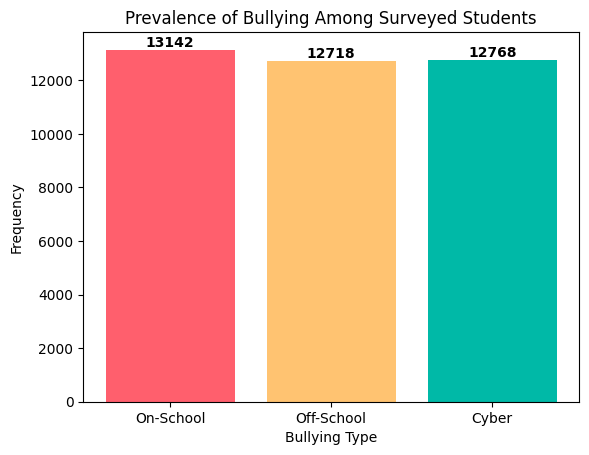

In [49]:
import matplotlib.pyplot as plt

# Count the frequency of "Yes" for each type of bullying
bullying_counts = bully[['OnSchool_Bullying_12mo', 'OffSchool_Bullying_12mo', 'Cyberbullying_12mo']].apply(lambda x: x[x == 'Yes'].count())

# Define vibrant colors for each bar
colors = ['#FF5F6D', '#FFC371', '#00B9A7']

# Plot the bar chart
plt.bar(bullying_counts.index, bullying_counts.values, color=colors)

# Add counts on top of each bar
for i, count in enumerate(bullying_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

# Set the labels and title
plt.xlabel('Bullying Type')
plt.ylabel('Frequency')
plt.title('Prevalence of Bullying Among Surveyed Students')

# Update x-axis tick labels
plt.xticks(range(len(bullying_counts.index)), ['On-School', 'Off-School', 'Cyber'])

# Show the plot
plt.show()

#### Students are often bullied on premisis i.e; on school but bullying tends to continue off school and on the internet as well.

## 2. Are there any gender differences in bullying experiences?

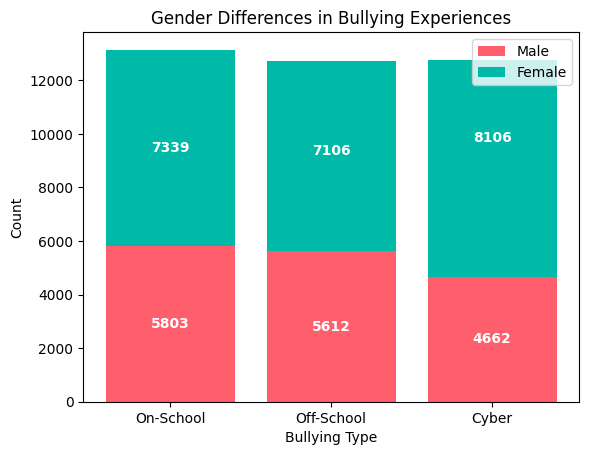

In [50]:
import matplotlib.pyplot as plt

# Filter the dataset for rows where OnSchool_Bullying_12mo is 'Yes'
on_school_bullying_yes = bully[bully['OnSchool_Bullying_12mo'] == 'Yes']

# Count the occurrences of each gender
on_school_gender_counts = on_school_bullying_yes['Sex'].value_counts()

# Filter the dataset for rows where OffSchool_Bullying_12mo is 'Yes'
off_school_bullying_yes = bully[bully['OffSchool_Bullying_12mo'] == 'Yes']

# Count the occurrences of each gender
off_school_gender_counts = off_school_bullying_yes['Sex'].value_counts()

# Filter the dataset for rows where Cyberbullying_12mo is 'Yes'
cyber_bullying_yes = bully[bully['Cyberbullying_12mo'] == 'Yes']

# Count the occurrences of each gender
cyber_bullying_gender_counts = cyber_bullying_yes['Sex'].value_counts()

# Set the colors for males and females
colors = ['#FF5F6D', '#00B9A7']

# Plot the stacked bar chart
plt.bar(['On-School', 'Off-School', 'Cyber'],
        [on_school_gender_counts['Male'], off_school_gender_counts['Male'], cyber_bullying_gender_counts['Male']],
        color=colors[0], label='Male')
plt.bar(['On-School', 'Off-School', 'Cyber'],
        [on_school_gender_counts['Female'], off_school_gender_counts['Female'], cyber_bullying_gender_counts['Female']],
        bottom=[on_school_gender_counts['Male'], off_school_gender_counts['Male'], cyber_bullying_gender_counts['Male']],
        color=colors[1], label='Female')

# Add count values for males
for i, count in enumerate([on_school_gender_counts['Male'], off_school_gender_counts['Male'], cyber_bullying_gender_counts['Male']]):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='white', fontweight='bold')

# Add count values for females
for i, count in enumerate([on_school_gender_counts['Female'], off_school_gender_counts['Female'], cyber_bullying_gender_counts['Female']]):
    plt.text(i, count / 2 + on_school_gender_counts['Male'], str(count), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
plt.xlabel('Bullying Type')
plt.ylabel('Count')
plt.title('Gender Differences in Bullying Experiences')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### From the above plot, it could be seen that the victims are higher if they are 'Females' in all the categories. In cyber-bullying, it's almost double than that of Male victims.

## 3. How does the number of close friends relate to the feeling of loneliness due to bullying?

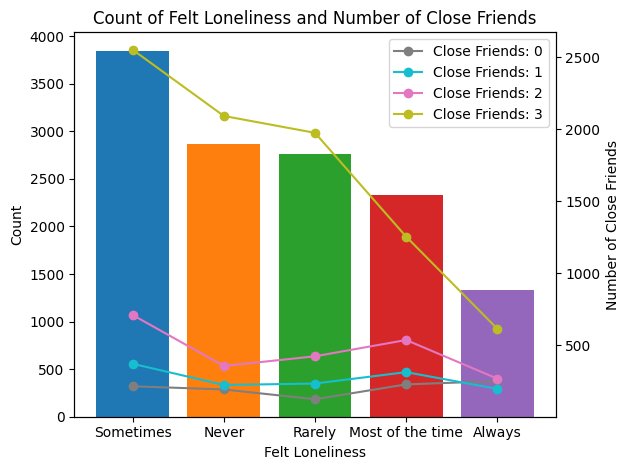

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataset for rows where bullying is 'Yes'
bullying_yes_df = bully[bully['OnSchool_Bullying_12mo'] == 'Yes']

# Define colors for the bar graph
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Define colors for the line graphs
line_colors = ['tab:gray', 'tab:cyan', 'tab:pink', 'tab:olive']

# Count the occurrences of each value in 'Felt_Lonely' column
loneliness_counts = bullying_yes_df['Felt_lonely'].value_counts()

# Get unique values of 'Close_friends'
close_friends_values = np.sort(bullying_yes_df['Close_friends'].unique())

# Initialize a figure with two y-axes
fig, ax1 = plt.subplots()

# Plot the bar graph for 'Felt_Lonely' counts
ax1.bar(loneliness_counts.index, loneliness_counts.values, color=bar_colors)
ax1.set_xlabel('Felt Loneliness')
ax1.set_ylabel('Count', color='black')
ax1.tick_params('y', colors='black')

# Create line graphs for each value of 'Close_friends'
ax2 = ax1.twinx()
for i, close_friends_value in enumerate(close_friends_values):
    close_friends_count = bullying_yes_df[bullying_yes_df['Close_friends'] == close_friends_value]['Felt_lonely'].value_counts()
    ax2.plot(close_friends_count.reindex(loneliness_counts.index).index, close_friends_count.reindex(loneliness_counts.index).values, marker='o', label=f'Close Friends: {close_friends_value}', color=line_colors[i % len(line_colors)])
ax2.set_ylabel('Number of Close Friends')
ax2.tick_params('y')

# Set the title and legends
plt.title('Count of Felt Loneliness and Number of Close Friends')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

#### Victims tend to feel lonely more only sometimes and number of close friends also have the same effect in feeling lonely, for every count of friend the victim has, the more lonely a victim feels is just sometimes during a period of bullying

## 4. Are there any differences in the level of support from classmates and parents?

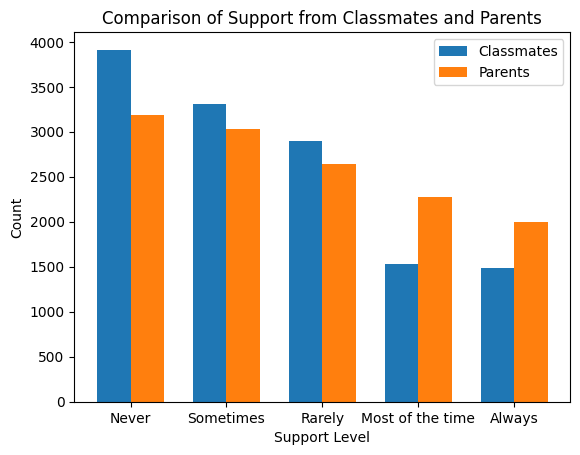

In [59]:
bullying_yes_df = bully[bully['OnSchool_Bullying_12mo'] == 'Yes']

# Count the occurrences of each level of support from classmates
classmates_support_counts = bullying_yes_df['Supportive_Classmates'].value_counts()

# Count the occurrences of each level of support from parents
parents_support_counts = bullying_yes_df['Supportive_Parents'].value_counts()

# Get the unique support levels
support_levels = bullying_yes_df['Supportive_Classmates'].unique()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(support_levels))
r2 = [x + bar_width for x in r1]

# Create a grouped bar chart
plt.bar(r1, classmates_support_counts, color='tab:blue', width=bar_width, label='Classmates')
plt.bar(r2, parents_support_counts, color='tab:orange', width=bar_width, label='Parents')

# Set the x-axis labels and tick positions
plt.xlabel('Support Level')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(support_levels))], support_levels)

# Set the title and legend
plt.title('Comparison of Support from Classmates and Parents')
plt.legend()

# Show the plot
plt.show()


#### From the above graph, it could be said that the parents are more supportive when a child is being bullied rather than friends. The parents are more supportive when the support levels are 'Most of the time' and 'Always' which might be a good sign for a victim

## 5. Does persistent loneliness have an impact on school attendance?

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


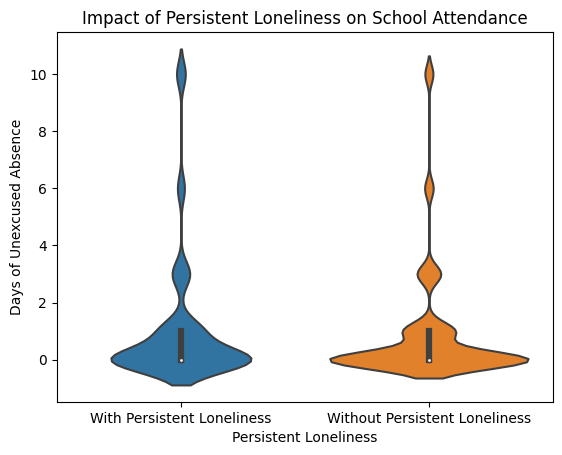

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for rows where bullying is 'Yes'
bullying_yes_df = bully[bully['OnSchool_Bullying_12mo'] == 'Yes']

# Select the attendance data for students with and without persistent loneliness
attendance_with_loneliness = bullying_yes_df[bullying_yes_df['Persistent_Loneliness'] == 'Yes']['Days_Unexcused_Absence']
attendance_without_loneliness = bullying_yes_df[bullying_yes_df['Persistent_Loneliness'] == 'No']['Days_Unexcused_Absence']

# Combine the attendance data into a single DataFrame
attendance_data = pd.DataFrame({'With Persistent Loneliness': attendance_with_loneliness,
                                'Without Persistent Loneliness': attendance_without_loneliness})

# Create a violin plot to compare attendance
sns.violinplot(data=attendance_data)

# Set the labels and title
plt.xlabel('Persistent Loneliness')
plt.ylabel('Days of Unexcused Absence')
plt.title('Impact of Persistent Loneliness on School Attendance')

# Show the plot
plt.show()

#### It could be said that the loneliness might not be a factor for school attendence since a victim with and without loneliness tend to have close to 0 unexcused leaves but students without loneliness tends to be going to school regularly.

## 6. Is there a relationship between weight status (underweight, overweight, obese) and bullying experiences?

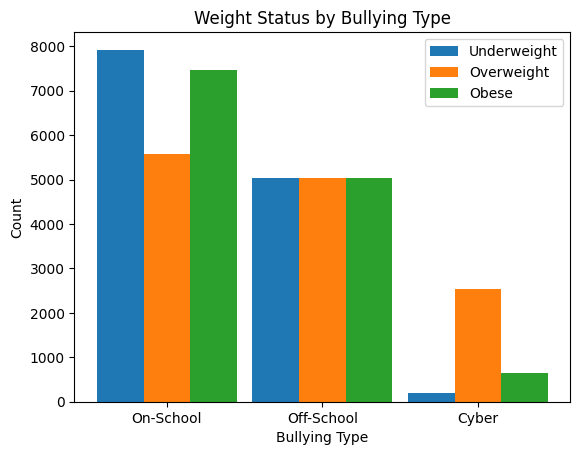

In [64]:
import matplotlib.pyplot as plt

# Filter the dataset for rows where bullying is 'Yes'
bullying_yes_df = bully[bully['OnSchool_Bullying_12mo'] == 'Yes']
on_school_counts = bullying_yes_df['Underweight'].value_counts(), bullying_yes_df['Overweight'].value_counts(), bullying_yes_df['Obese'].value_counts()

bullying_yes_df = bully[bully['OffSchool_Bullying_12mo'] == 'Yes']
off_school_counts = bullying_yes_df['Underweight'].value_counts(), bullying_yes_df['Overweight'].value_counts(), bullying_yes_df['Obese'].value_counts()

bullying_yes_df = bully[bully['Cyberbullying_12mo'] == 'Yes']
cyber_counts = bullying_yes_df['Underweight'].value_counts(), bullying_yes_df['Overweight'].value_counts(), bullying_yes_df['Obese'].value_counts()

# Get the unique weight statuses
weight_statuses = ['On-School', 'Off-School', 'Cyber']

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(weight_statuses))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

# Create a grouped bar chart
plt.bar(r1, on_school_counts[0], color='tab:blue', width=bar_width, label='Underweight')
plt.bar(r2, on_school_counts[1], color='tab:orange', width=bar_width, label='Overweight')
plt.bar(r3, on_school_counts[2], color='tab:green', width=bar_width, label='Obese')

# Set the x-axis labels and tick positions
plt.xlabel('Bullying Type')
plt.ylabel('Count')
plt.xticks([r + bar_width for r in range(len(weight_statuses))], weight_statuses)

# Set the title and legend
plt.title('Weight Status by Bullying Type')
plt.legend()

# Show the plot
plt.show()


#### The victims who are underweight tend to be bullied more on school premesis, while people who are obese tend to be highest victims of Cyber bullying